# Data Pre-processing Techniques

Data preprocessing involves seveal transformation that are applied to the raw data to amek it more amenable for learning. It is carried out before using it for model training or prediction

There are many pre-processing techiques for
- Data cleaning
  - Data imputation
  - Feature Scaling
- Feature transformation
  - Polynomial Features
  - Discretization
  - Handling categorical features
  - Custom Transformer
  - Composite Transformers
    - Apply transformation to diverse features
    - TargetTransformedRegressor
- Feature Selection
  - Filter based feature selection
  - Wrapper based feature selection
- Feature Extraction
  - PCA
the transforamtion are applied in a specific order and the order can be specified via Pipeline. We need to applu different transformations based on the feature type. FeatureUnion helps us perform that task and combine outouts from multiple transformations into a singletransformed feature matrix. We will also study as how to visualize this pipline.


##Importing basic libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

## **1. Feature Extraction**

### DictVectorizer

DictVectorizer converts a list of dictionary objects to feature matrix

In [ ]:
data = [{'age':4,'height':96},{'age':3,'height':73.9},{'age':1,'height':88.9},{'age':2,'height':81.6}]

In [ ]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
data_transformed

array([[ 4. , 96. ],
       [ 3. , 73.9],
       [ 1. , 88.9],
       [ 2. , 81.6]])

In [ ]:
data_transformed.shape

(4, 2)

## **2. Data Imputation**

In [ ]:
from sklearn.impute import SimpleImputer

### Data Imputation on real world dataset

In [ ]:
cols = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None,names=cols)

**STEP:1** Check if the dataset contains missing values
- Can be checked via dataset description or by check number of `nan` or `np.null` in the dataframe. Performed only for numerical feature
- For non-numerical features, we can list their unique values and check if their values like `?`

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [ ]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

There are two non-numerical feature: `ca` and `thal`

In [ ]:
print("Unique values in ca:", heart_data.ca.unique())
print("Unique values in thal:", heart_data.thal.unique())

Unique values in ca: ['0.0' '3.0' '2.0' '1.0' '?']
Unique values in thal: ['6.0' '3.0' '7.0' '?']


In [ ]:
print("#missing values in ca: ", heart_data.loc[heart_data.ca=='?','ca'].count())
print("#missing values in thal: ", heart_data.loc[heart_data.thal=='?','thal'].count())

#missing values in ca:  4
#missing values in thal:  2


**STEP-2:** Replcae '?' with `nan`

In [ ]:
heart_data.replace('?',np.nan,inplace=True)

**STEP-3:** fill the missing values with `sklearn` missing value imputation utilities.
  Here we use `SimpleImputer` with `mean` strategy
  

We will try two variations-
- `add_indicator=False` Default choice that only imputes missing values

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(heart_data)
heart_data_imputed = imputer.transform(heart_data)
print(heart_data_imputed.shape)

(303, 14)


- `add_indicator=True`: Adds additional column for each column containing missing values. In our case, this adds two columns one for `ca` and other for `thal`. It indicates if the sample has a missing value

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', add_indicator=True)
imputer = imputer.fit(heart_data)
heart_data_imputed_with_indiactor = imputer.transform(heart_data)
print(heart_data_imputed_with_indiactor.shape)

(303, 16)


## **3. Feature Scaling**

Feature scaling transforms feature values such that all the features on the same scale. 
- Enables faster convergence
- Performance of ML algo like SVM, K-NN and K-means that compute Eucleadean distance get impacted.

Tree based ML algorithm are not affected by feature scaling. Thus feature scaling is not required for tree baed ML algorithm
Faeture scaling performed with the following methods:
- Standardization
- Normalization
- MaxAbsScaler

In [ ]:
cols= ['Sex','Length','Diameter','Height','Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',header=None,names=cols)

### **STEP 1:** Examine the dataset
Feature scaling is done only on numerical data. Let's check which are numerical attributes in this dataset. We get that via info()

In [ ]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


**Step-1a**[OPTIONAL]: Convert non-numerical attributes to numerical ones
> In this dataset, `Sex` is a non-numeric column in this dataset. Let's examine it and see if we can convert it to numeric representation:

In [ ]:
abalone_data.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [ ]:
#Assign numerical value to sex
abalone_data = abalone_data.replace({"Sex":{"M":1,"F":2,"I":3}})
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


### **STEP-2:**Sepearate labels from features
we don't want to perform feature scaling on labels

In [ ]:
y = abalone_data.pop("Rings")
print("the DataFrame object after deleting the column")
abalone_data.info()

the DataFrame object after deleting the column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [ ]:
in_cols=abalone_data.columns

### **STEP-3:** Examine feature scales

#### Statistical method
Check the scales of different feature with `describe()` method of dataframe

In [ ]:
abalone_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4177.0,1.955470,0.827815,1.0000,1.0000,2.0000,3.000,3.0000
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050


Note that:
- there are 4177 examples in this dataset
- the mean and standard deviation of features are quite different from one another
> We can confirm that with a variety of visualization techniques and plots


#### Visualization of feature distribution
- Histogram
- Kernel density estimation
- Box plot
- violin

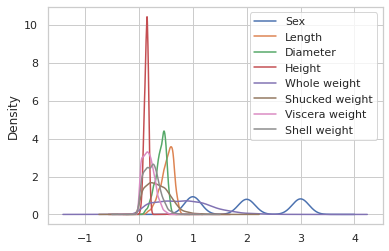

In [ ]:
#KDE-Plot
ax = abalone_data.plot.kde()

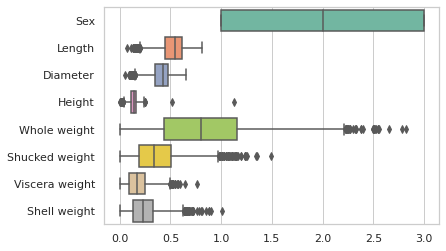

In [ ]:
ax=sns.boxplot(data=abalone_data,orient="h",palette="Set2")

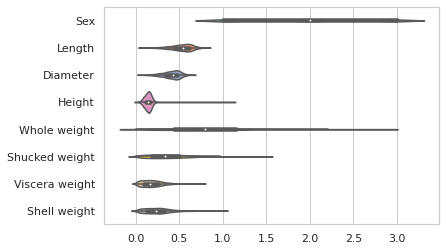

In [ ]:
ax=sns.violinplot(data=abalone_data,orient="h",palette="Set2")

### **STEP-4**: Scaling

#### Normalization
- MaxAbsoluteScaler
- MinMaxScaler

In [ ]:
#Reshaping vector into matrix
x = np.array([4,2,5,-1,-100]).reshape(-1,1)
print(x)

[[   4]
 [   2]
 [   5]
 [  -1]
 [-100]]


In [ ]:
from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()
x_new = mas.fit_transform(x)
print(x_new)

[[ 0.04]
 [ 0.02]
 [ 0.05]
 [-0.01]
 [-1.  ]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
X=abalone_data
mm = MinMaxScaler()
X_normalized = mm.fit_transform(X)
X_normalized[:5]

array([[0.        , 0.51351351, 0.5210084 , 0.0840708 , 0.18133522,
        0.15030262, 0.1323239 , 0.14798206],
       [0.        , 0.37162162, 0.35294118, 0.07964602, 0.07915707,
        0.06624075, 0.06319947, 0.06826109],
       [0.5       , 0.61486486, 0.61344538, 0.11946903, 0.23906499,
        0.17182246, 0.18564845, 0.2077728 ],
       [0.        , 0.49324324, 0.5210084 , 0.11061947, 0.18204356,
        0.14425017, 0.14944042, 0.15296462],
       [1.        , 0.34459459, 0.33613445, 0.07079646, 0.07189658,
        0.0595158 , 0.05134957, 0.0533134 ]])

In [ ]:
X_normalized.mean(axis=0)

array([0.47773522, 0.60674608, 0.59307774, 0.12346584, 0.29280756,
       0.24100033, 0.23712127, 0.2365031 ])

In [ ]:
X_normalized.std(axis=0)

array([0.4138578 , 0.16226829, 0.16676972, 0.03701066, 0.17366046,
       0.14925109, 0.14430695, 0.13870055])

#### Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_standardized = ss.fit_transform(X)
X_standardized[:5]

array([[-1.15434629, -0.57455813, -0.43214879, -1.06442415, -0.64189823,
        -0.60768536, -0.72621157, -0.63821689],
       [-1.15434629, -1.44898585, -1.439929  , -1.18397831, -1.23027711,
        -1.17090984, -1.20522124, -1.21298732],
       [ 0.05379815,  0.05003309,  0.12213032, -0.10799087, -0.30946926,
        -0.4634999 , -0.35668983, -0.20713907],
       [-1.15434629, -0.69947638, -0.43214879, -0.34709919, -0.63781934,
        -0.64823753, -0.60759966, -0.60229374],
       [ 1.26194258, -1.61554351, -1.54070702, -1.42308663, -1.27208566,
        -1.2159678 , -1.28733718, -1.32075677]])

In [ ]:
X_standardized.mean(axis=0)


array([-1.19075871e-17, -5.83471770e-16, -3.02792930e-16,  3.91249292e-16,
        9.18585294e-17, -1.02065033e-17,  2.70472337e-16,  2.97689679e-16])

In [ ]:
X_standardized.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
data=pd.DataFrame(X_standardized,columns=in_cols)

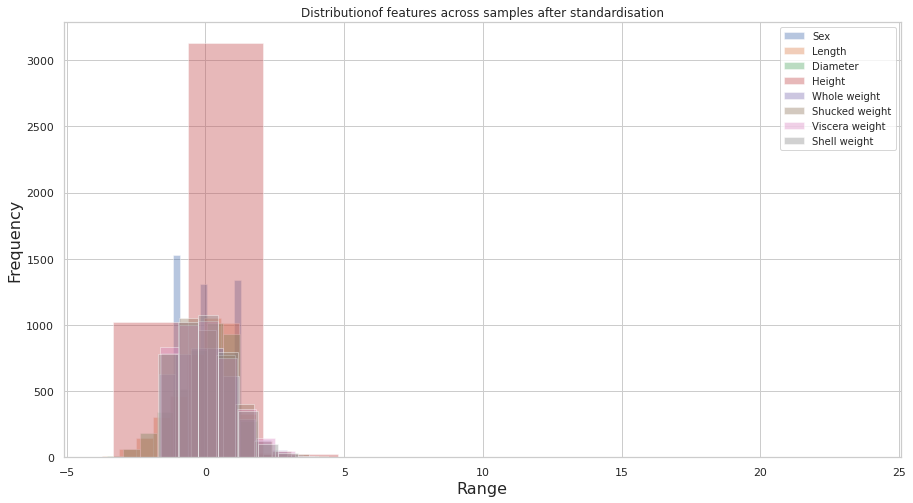

In [ ]:
#@title[Histogram-combined]

plt.figure(figsize=(15,8))
data=pd.DataFrame(X_standardized,columns=in_cols)
for colname in abalone_data:
  plt.hist(data[colname].values, alpha=0.4)
plt.legend(in_cols, fontsize=10,loc="upper right", frameon=True)
plt.title("Distributionof features across samples after standardisation")
plt.xlabel('Range',fontsize=16)
plt.ylabel('Frequency',fontsize=16)

plt.show()

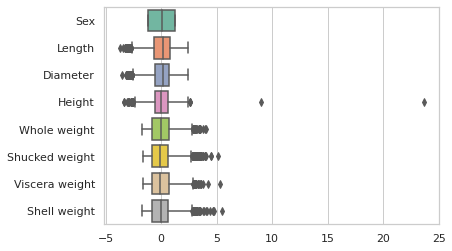

In [ ]:
ax=sns.boxplot(data=data,orient="h",palette="Set2")

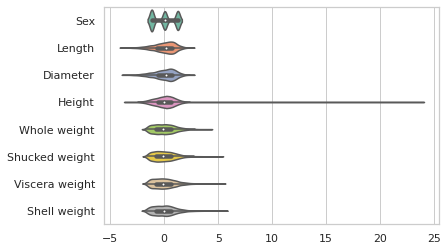

In [ ]:
ax=sns.violinplot(data=data,orient="h",palette="Set2")

## **4. ``add_dummy_feature``**
Augments dataset with a column vector each value in the column vector is 1. This is useful for adding a parameter for bias term in the model.

In [ ]:
x=np.array(
    [
     [7,1],
     [1,8],
     [2,0],
     [9,6]
    ]
)
from sklearn.preprocessing import add_dummy_feature

x_new =add_dummy_feature(x)
print(x_new)

[[1. 7. 1.]
 [1. 1. 8.]
 [1. 2. 0.]
 [1. 9. 6.]]


## **5. Custom Transformers**

Enables oonversion of an existing Python function into a transformer to assist in data cleaning or processing.
Useful when:
1. The dataset consists of heterogeneous data tyoes(e.g raster images and text captions)
2. The dataset is stored in a `pandas.Dataframe` and different columns require different processing pipelines
3. We need stateless transformations such as taking the log of frequencies, custom scaling, etc.

In [ ]:
from sklearn.preprocessing import FunctionTransformer

In [ ]:
wine_data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=";")

In [ ]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Using `np.log1p` which returns natural logarithm of (1+feature value)

In [ ]:
transformer = FunctionTransformer(np.log1p, validate=True)
wine_data_transformed = transformer.transform(np.array(wine_data))
pd.DataFrame(wine_data_transformed,columns=wine_data.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,2.215842,0.178100,1.722767,2.091864,2.186051,2.322388,2.827314
volatile acidity,1599.0,0.417173,0.114926,0.113329,0.329304,0.418710,0.494696,0.947789
citric acid,1599.0,0.228147,0.152423,0.000000,0.086178,0.231112,0.350657,0.693147
residual sugar,1599.0,1.218131,0.269969,0.641854,1.064711,1.163151,1.280934,2.803360
chlorides,1599.0,0.083038,0.038991,0.011929,0.067659,0.076035,0.086178,0.476855
free sulfur dioxide,1599.0,2.639013,0.623790,0.693147,2.079442,2.708050,3.091042,4.290459
total sulfur dioxide,1599.0,3.634750,0.682575,1.945910,3.135494,3.663562,4.143135,5.669881
density,1599.0,0.691519,0.000945,0.688170,0.690945,0.691521,0.692064,0.694990
pH,1599.0,1.460557,0.035760,1.319086,1.437463,1.460938,1.481605,1.611436
sulphates,1599.0,0.501073,0.093731,0.285179,0.438255,0.482426,0.548121,1.098612


## **6. Polynomial Features**

generate a new feature matrix consisting of all pplynomial combinations of the features with degree less than or equal to the specified degree.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
wine_data_copy = wine_data.copy()
wine_data = wine_data.drop(['quality'], axis=1)
print('Number of features before transformation = ', wine_data.shape)

#Let's fit degree 2 polynomial to wine_data
poly = PolynomialFeatures(degree=2)
poly_wine_data = poly.fit_transform(wine_data)
print('Number of fearures after transformation = ', poly_wine_data.shape)

Number of features before transformation =  (1599, 11)
Number of fearures after transformation =  (1599, 78)


In [ ]:
poly.get_feature_names_out()

array(['1', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'fixed acidity^2', 'fixed acidity volatile acidity',
       'fixed acidity citric acid', 'fixed acidity residual sugar',
       'fixed acidity chlorides', 'fixed acidity free sulfur dioxide',
       'fixed acidity total sulfur dioxide', 'fixed acidity density',
       'fixed acidity pH', 'fixed acidity sulphates',
       'fixed acidity alcohol', 'volatile acidity^2',
       'volatile acidity citric acid', 'volatile acidity residual sugar',
       'volatile acidity chlorides',
       'volatile acidity free sulfur dioxide',
       'volatile acidity total sulfur dioxide',
       'volatile acidity density', 'volatile acidity pH',
       'volatile acidity sulphates', 'volatile acidity alcohol',
       'citric acid^2', 'citric acid residual sugar',
       'citric acid chlorides', 'citric aci

## **7. Discretization**

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
wine_data = wine_data_copy.copy()

enc = KBinsDiscretizer(n_bins=10, encode="onehot")
X= np.array(wine_data['chlorides']).reshape(-1,1)
X_binned = enc.fit_transform(X)

In [ ]:
wine_data['chlorides'].min()

0.012

In [ ]:
X_binned

<1599x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1599 stored elements in Compressed Sparse Row format>

In [ ]:
X_binned.toarray()[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

## **8. Handling Categorical Features**

Types:
1. Ordinal Encoding
2. One-hot encoding
3. Label encoder
4. Using dummy variables


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
cols = ['sepal length','sepal width','petal length','petal width','label']
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None,names=cols)
iris_data.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_data.label.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
onehotencoder = OneHotEncoder(categories = 'auto')
print('shape of y before encoding', iris_data.label.shape)

'''
Passing 1d arrays as data to onehotencoder is deprecated in version,
hence reshape to (-1,1) to have two dimensions.
Input of onehotencoder fit_transform must not be 1-rank array
'''
iris_labels = onehotencoder.fit_transform(iris_data.label.values.reshape(-1,1))

#y.reshape(-1,1) is a 450x1 sparse matrix of type <class numpy.float64>
# with 150 stored elements in coordinate format.
#y is a 150x3 sparse matrix  with 150 stored elements in compressed sparse row format
print('Shape of y afer encoding', iris_labels.shape)

#since output is sparse use to_array() to expand it
print('First 5 labels:')
print(iris_labels.toarray()[:5])

shape of y before encoding (150,)
Shape of y afer encoding (150, 3)
First 5 labels:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
enc=OrdinalEncoder()
iris_labels = np.array(iris_data['label'])
iris_labels_transformed = enc.fit_transform(iris_labels.reshape(-1,1))
print('Unique labels: ', np.unique(iris_labels_transformed))

print("\n First 5 labels are:")
print(iris_labels_transformed[:5])

Unique labels:  [0. 1. 2.]

 First 5 labels are:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


### ***LabelEncoder***

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#get the class column in a new variable
iris_labels = np.array(iris_data['label'])

#encode the class names to integers
enc = LabelEncoder()
label_integer = enc.fit_transform(iris_labels)
label_integer

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### MultilabelBinarizer

Encodes categorical features with values between 0 to k-1 where k is number of classes

In [ ]:
movie_genres = [{'action','comedy'},{'comedy'},{'action','thriller'},{'science-fiction','action','thriller'}]

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit_transform(movie_genres)

array([[1, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 1]])

### **Using dummy variables**

In [ ]:
# use get_dummies to create a one-hot encoding for each unique categorical value in the 'class' column
#Convert categorical clas variable to one-hot encoding.
iris_data_onehot = pd.get_dummies(iris_data,columns=['label'],prefix=['one_hot'])
iris_data_onehot

,sepal length,sepal width,petal length,petal width,one_hot_Iris-setosa,one_hot_Iris-versicolor,one_hot_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


## **9. Composite Transformer**


### ColumnTransformer

In [ ]:
x= [[20.0,'male'],[11.2,'female'],[15.6,'female'],[13.0,'male'],[18.6,'male'],[16.4,'female']]

In [ ]:
x=np.array(x)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder

ct = ColumnTransformer([('scaler',MaxAbsScaler(),[0]),('pass','passthrough',[0]),('encoder',OneHotEncoder(),[1])])
ct.fit_transform(x)

array([['1.0', '20.0', '0.0', '1.0'],
       ['0.5599999999999999', '11.2', '1.0', '0.0'],
       ['0.78', '15.6', '1.0', '0.0'],
       ['0.65', '13.0', '0.0', '1.0'],
       ['0.93', '18.6', '0.0', '1.0'],
       ['0.82', '16.4', '1.0', '0.0']], dtype='<U32')

### TransformedTargetRegressor
Transforms the target variable y before fitting a regression model
- The predicted values are mapped back to the original space via an inverse transform
- It takes regressor and transformer to be applied to the target variable as arguments

In [ ]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing



In [ ]:
X,y = fetch_california_housing(return_X_y=True)
X,y = X[:2000,:],y[:2000] #select a subset of data
transformer = MaxAbsScaler()
#Two regressor- one based on the original label.
regressor = LinearRegression()

#second regressor with transformed labels.
regr = TransformedTargetRegressor(regressor=regressor,transformer=transformer)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
regr.fit(X_train,y_train)
print('R2 score of transformed label regression: {0:.2f}'.format(regr.score(X_test,y_test)))

raw_target_regr = LinearRegression().fit(X_train,y_train)
print('R2 score of raw label regression: {0:.2f}'.format(raw_target_regr.score(X_test,y_test)))

R2 score of transformed label regression: 0.59
R2 score of raw label regression: 0.59


## **10. Feature Selection**

### Filter based Methods

#### **VarianceThreshold**

In [ ]:
data = [{'age':4,'heoght':96},{'age':3,'heoght':73.9},{'age':1,'heoght':88.9},{'age':2,'heoght':81.6}]
dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
np.var(data_transformed,axis=0)

array([ 1.25 , 67.735])

In [ ]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=9)
data_new = vt.fit_transform(data_transformed)
data_new

array([[96. ],
       [73.9],
       [88.9],
       [81.6]])

#### **SelectKBest**

In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest, mutual_info_regression

X_california, y_california = fetch_california_housing(return_X_y=True)

X,y = X_california[:2000,:],y_california[:2000]
print(f'Shape of feature matrix before feature selection: {X.shape}')

Shape of feature matrix before feature selection: (2000, 8)


Selecting 3 most import features, since it is regression problem, we can use only `mutual_info_regression` or `f_regression` scoring functions only

In [ ]:
skb = SelectKBest(mutual_info_regression,k=3)
X_new = skb.fit_transform(X,y)
print(f'Shape of feature matrix after feature selection: {X_new.shape}')

Shape of feature matrix after feature selection: (2000, 3)


In [ ]:
skb.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)

#### **SelectPercentile**

In [ ]:
from sklearn.feature_selection import SelectPercentile

sp = SelectPercentile(mutual_info_regression,percentile=30)
X_new = sp.fit_transform(X,y)
print(f'Shape of feature matrix after feature selection: {X_new.shape}')
sp.get_feature_names_out()

Shape of feature matrix after feature selection: (2000, 3)


array(['x0', 'x6', 'x7'], dtype=object)

#### **GenericUnivariateSelect**

In [ ]:
from sklearn.feature_selection import GenericUnivariateSelect

gus = GenericUnivariateSelect(mutual_info_regression,mode='k_best',param=3)
X_new = gus.fit_transform(X,y)
print(f'Shape of feature matrix after feature selection: {X_new.shape}')
gus.get_feature_names_out()

Shape of feature matrix after feature selection: (2000, 3)


array(['x0', 'x6', 'x7'], dtype=object)

### **Wrapper based Methods**

#### RFE(Recursive Feaute elimination)

In [ ]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator,n_features_to_select=3,step=1)
selector = selector.fit(X,y)

print(selector.support_)


print(f'Rank of each feature is: {selector.ranking_}')

[ True False False False False False  True  True]
Rank of each feature is: [1 5 4 3 6 2 1 1]


In [ ]:
X_new = selector.transform(X)
print(f'Shape of feature matrix after feature selection:{X_new.shape}')

Shape of feature matrix after feature selection:(2000, 3)


#### RFE-CV
adds another layer of cross validation to RFE


#### SelectFromModel

In [ ]:
from sklearn.feature_selection import SelectFromModel
estimator = LinearRegression()
estimator.fit(X,y)

print(f'Coefficients of feautes:{estimator.coef_}')
print(f'Indices of top {3} features: {np.argsort(estimator.coef_)[-3:]}')
t=np.argsort(np.abs(estimator.coef_))[-3:]
model = SelectFromModel(estimator, max_features=3, prefit=True)
X_new= model.transform(X)
print(f'Shape of feature matrix after feature selection:{X_new.shape}')

Coefficients of feautes:[ 3.64048292e-01  5.56221906e-03  5.13591243e-02 -1.64474348e-01
  5.90411479e-05 -1.64573915e-01 -2.17724525e-01 -1.85343265e-01]
Indices of top 3 features: [1 2 0]
Shape of feature matrix after feature selection:(2000, 3)


#### SequentialFeatureSelection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector




In [ ]:
%%time
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator,n_features_to_select=3)
sfs.fit_transform(X,y)
print(sfs.get_support())

[ True False False False False  True  True False]
CPU times: user 181 ms, sys: 56.9 ms, total: 238 ms
Wall time: 200 ms


In [ ]:
%%time
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator,n_features_to_select=3, direction='backward')
sfs.fit_transform(X,y)
print(sfs.get_support())

[ True False False False False  True  True False]
CPU times: user 322 ms, sys: 173 ms, total: 495 ms
Wall time: 295 ms


## **11. PCA**

In [ ]:
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [ ]:
from sklearn.datasets import make_regression
data = make_regression(n_samples=300, n_features=4, n_targets=1, 
                       random_state=10)


In [ ]:
data = np.column_stack((data[0],data[1].reshape(-1,1)))
pca.fit(data)

PCA(n_components=2)

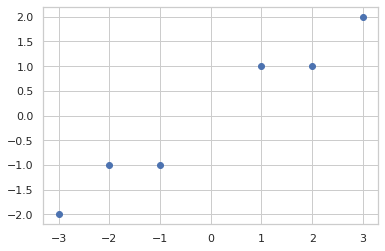

In [ ]:
plt.scatter(X[:,0],X[:,1])

In [ ]:
print(f'The {pca.n_components_} principal axes are\n',pca.components_)


The 2 principal axes are
 [[-4.56257589e-03 -3.75219329e-03 -2.31161765e-03 -3.64002777e-03
  -9.99973255e-01]
 [ 6.64266795e-01 -1.07989178e-01 -7.21418420e-01 -1.63227731e-01
  -3.63784101e-04]]


**Each column represent a principal component**




In [ ]:
print('Expalained variance by each component', pca.explained_variance_)
print('Mean across z1 and x2 dimensions is: ', pca.mean_)

Expalained variance by each component [1.73534658e+04 9.39892346e-01]
Mean across z1 and x2 dimensions is:  [ 0.07342223  0.02207096 -0.0444939  -0.05586869  1.01506517]


## **12. Chaining Transformers**

### Pipeline
- Intermediate steps of the pipeline must be 'transformers' that is, they must implement fit and transform method
- The final estimator only needs to implement fit

#### Creating Pipeline

# Practice Assignment

In [ ]:
data=pd.read_csv("/content/drive/Othercomputers/My MacBook Air/IIT MADRAS DEGREE/Diploma/Data Science/MLP/Slides/Week 2/DataPreprocessingGraded_dataset.csv")

In [ ]:
data

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,?,?,4000.0,35.0,NEGATIVE,YES
3,?,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO
...,...,...,...,...,...,...
743,23.0,2.0,500.0,38.0,NEGATIVE,NO
744,21.0,2.0,500.0,52.0,NEGATIVE,NO
745,23.0,3.0,750.0,62.0,NEGATIVE,NO
746,39.0,1.0,250.0,39.0,NEGATIVE,NO


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      748 non-null    object 
 1   V2      748 non-null    object 
 2   V3      748 non-null    float64
 3   V4      748 non-null    float64
 4   V5      748 non-null    object 
 5   Target  748 non-null    object 
dtypes: float64(2), object(4)
memory usage: 35.2+ KB


In [ ]:
data.describe()

,V3,V4
count,748.000000,748.000000
mean,1378.676471,34.282086
std,1459.826781,24.376714
min,250.000000,2.000000
25%,500.000000,16.000000
50%,1000.000000,28.000000
75%,1750.000000,50.000000
max,12500.000000,98.000000


In [ ]:
#@title Q-4
data["V1"] = pd.to_numeric(data.V1,errors='coerce')
data["V2"] = pd.to_numeric(data.V2,errors='coerce')



In [ ]:
data.describe()

,V1,V2,V3,V4
count,743.000000,743.000000,748.000000,748.000000
mean,9.562584,5.464334,1378.676471,34.282086
std,8.093527,5.799759,1459.826781,24.376714
min,0.000000,1.000000,250.000000,2.000000
25%,3.000000,2.000000,500.000000,16.000000
50%,8.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,50.000000
max,74.000000,50.000000,12500.000000,98.000000


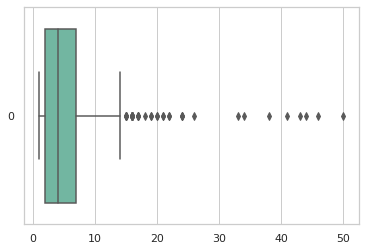

In [ ]:
#@title Q-5

ax=sns.boxplot(data=data.V2,orient="h",palette="Set2")

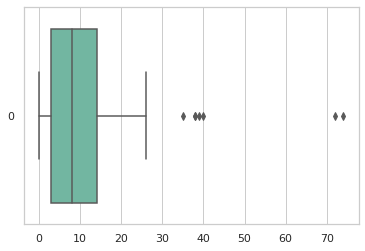

In [ ]:
ax=sns.boxplot(data=data.V1,orient="h",palette="Set2")

In [ ]:
def get_num_outliers (column):
 q1 = np.percentile(column, 25)
 q3 = np.percentile(column, 75)
 return sum((column<q1) | (column>q3))
 

In [ ]:
print('v1',get_num_outliers(data.V1))
print('v2',get_num_outliers(data.V2))
print('v3',get_num_outliers(data.V3))
print('v4',get_num_outliers(data.V4))

v1 0
v2 0
v3 330
v4 362


In [ ]:
data['Target'].count()

748

In [ ]:
data.loc[data.Target=='YES','Target'].count()

178

In [ ]:
data.loc[data.Target=='NO','Target'].count()

570

In [ ]:
data.V5.unique()

array(['NEGATIVE'], dtype=object)

In [ ]:
data.loc[data.V1=='?','V1'].count()+data.loc[data.V2=='?','V2'].count()

0

In [ ]:
data.replace('?',np.nan,inplace=True)

In [ ]:
data

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,NaN,NaN,4000.0,35.0,NEGATIVE,YES
3,NaN,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO
...,...,...,...,...,...,...
743,23.0,2.0,500.0,38.0,NEGATIVE,NO
744,21.0,2.0,500.0,52.0,NEGATIVE,NO
745,23.0,3.0,750.0,62.0,NEGATIVE,NO
746,39.0,1.0,250.0,39.0,NEGATIVE,NO


In [ ]:
data = data.drop(['V5'], axis=1)

In [ ]:
data_copy = data.copy()
data = data.drop(['Target'],axis=1
                 )

In [ ]:
data

,V1,V2,V3,V4
0,2.0,50.0,12500.0,98.0
1,0.0,13.0,3250.0,28.0
2,NaN,NaN,4000.0,35.0
3,NaN,20.0,5000.0,45.0
4,1.0,24.0,6000.0,77.0
...,...,...,...,...
743,23.0,2.0,500.0,38.0
744,21.0,2.0,500.0,52.0
745,23.0,3.0,750.0,62.0
746,39.0,1.0,250.0,39.0


In [ ]:
#@title Q-9
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
imputed_data = imputer.fit_transform(data)

In [ ]:
np.mean(imputed_data[:,0])

9.552139037433156

In [ ]:
imputed_data

array([[2.00e+00, 5.00e+01, 1.25e+04, 9.80e+01],
       [0.00e+00, 1.30e+01, 3.25e+03, 2.80e+01],
       [8.00e+00, 4.00e+00, 4.00e+03, 3.50e+01],
       ...,
       [2.30e+01, 3.00e+00, 7.50e+02, 6.20e+01],
       [3.90e+01, 1.00e+00, 2.50e+02, 3.90e+01],
       [7.20e+01, 1.00e+00, 2.50e+02, 7.20e+01]])

In [ ]:
#@title Q-10
from sklearn.impute import KNNImputer
# knni = KNNImputer(n_neighbors=3)
# imputed_data = knni.fit_transform(data)
# np.mean(imputed_data[:,0])
ct = ColumnTransformer([('impute',KNNImputer(n_neighbors=3),[0])])
imp_data=ct.fit_transform(data)

In [ ]:
imp_data[:10]

array([[2.        ],
       [0.        ],
       [9.56258412],
       [9.56258412],
       [1.        ],
       [4.        ],
       [2.        ],
       [9.56258412],
       [2.        ],
       [5.        ]])

In [ ]:
imputed_data[:10,0]

array([2.        , 0.        , 9.        , 3.        , 1.        ,
       4.        , 2.        , 7.33333333, 2.        , 5.        ])

In [ ]:
si = SimpleImputer(missing_values=np.nan,strategy='mean')
imputed_data = si.fit_transform(data)
np.mean(imputed_data[:,1])

5.464333781965007

# Graded Assignment

In [ ]:
data=pd.read_csv("/content/drive/Othercomputers/My MacBook Air/IIT MADRAS DEGREE/Diploma/Data Science/MLP/Slides/Week 2/DataPreprocessingGraded_dataset.csv")

In [ ]:
X=data[data.columns[:5]]
y=data['Target']

In [ ]:
X.V1=X.V1.replace('?',np.NaN)
X.V2=X.V2.replace('?',np.NaN)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0.1)
numerical_pipe = ColumnTransformer([('impute',SimpleImputer(strategy='mean'),[0,1,2,3])])
scale_pipe = Pipeline(steps=[('numeric',numerical_pipe),
                             ('scale',StandardScaler())])
categorical_pipe = ColumnTransformer([('cat',OrdinalEncoder(),[4])])
complete_pipe = FeatureUnion([('numeric',scale_pipe),('cat',categorical_pipe)])
pipe = Pipeline(steps = [('cp',complete_pipe),('varianceThreshold',vt)])

tr_x=pipe.fit_transform(X)
tr_x.shape

(748, 4)

In [ ]:
#@title Q-2:
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression()
oe=OrdinalEncoder()
tr_y = oe.fit_transform(y)
rfe = RFE(estimator,n_features_to_select=2)

rfe.fit_transform(tr_x,tr_y.reshape(-1,))
rfe.support_

array([ True, False,  True, False])

In [ ]:
type(y)


pandas.core.series.Series

In [ ]:
y=pd.DataFrame(data.pop("Target"))

In [ ]:
type(y)

pandas.core.frame.DataFrame

In [ ]:
y

,Target
0,YES
1,YES
2,YES
3,YES
4,NO
...,...
743,NO
744,NO
745,NO
746,NO


In [ ]:
#@title Q-3:
selector = SequentialFeatureSelector(estimator=LogisticRegression(),n_features_to_select=2)
selector.fit(complete_pipe.fit_transform(X),tr_y.reshape(-1,))

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=2)

In [ ]:
selector.support_

array([False,  True, False,  True, False])

In [ ]:
#@title Q-4:
selector = SequentialFeatureSelector(estimator=LogisticRegression(),n_features_to_select=2, direction='backward')
selector.fit(complete_pipe.fit_transform(X),tr_y.reshape(-1,))

SequentialFeatureSelector(direction='backward', estimator=LogisticRegression(),
                          n_features_to_select=2)

In [ ]:
selector.support_

array([False, False,  True,  True, False])